<a href="https://colab.research.google.com/github/HeemaliGhorpade/DS_PY_Writeups_2001609/blob/main/Exp08_notebook_2001609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment No. 08**

**1. Define your Problem statement and ML technique I(one) you propose to use.**

**Ans.** **Problem Statement :** 
Develop a machine learning model for predicting the heavy drinking episodes via mobile data.

**ML Technique 1 :**

**Linear Regression**

We will build a Linear regression model for Bar Crawl dataset. The dataset consists of participant id, time and a sample from each axis of the accelerometer We will predict heavy drinking episodes of the participants

**2. Write about working of ML technique I you have proposed**

**Ans** **Definition & Working principle**

Let's build model using Linear regression.

Linear regression is a statistical method used to model and analyze the relationship between two or more variables. It is a technique for estimating the linear relationship between two quantitative variables, one being the independent variable or explanatory variable and the other being the dependent variable or response variable.

The working of linear regression involves identifying a straight line that can best fit the given data. The line is determined by the slope (gradient) and the y-intercept of the line. The slope represents the change in the dependent variable for every unit increase in the independent variable, while the y-intercept is the point at which the line intersects the y-axis.

To determine the line of best fit, the method of least squares is used. This involves minimizing the sum of the squared difference between the observed values and the predicted values. The predicted values are obtained using the equation of the line of best fit.

Linear regression can be used for both simple and multiple regression analysis. Simple linear regression involves only one independent variable, while multiple regression analysis involves two or more independent variables.

The results of linear regression analysis are typically presented in the form of an equation that can be used to predict the value of the dependent variable for any given value of the independent variable. The accuracy of the prediction depends on the strength of the relationship between the variables, which is measured by the coefficient of determination (R2). A higher R2 value indicates a stronger relationship between the variables.

**3. Pull your chosen data set from experiment 7**

**Ans** **Import Dataset**

In [3]:
import pandas as pd
accelerometer_info = pd.read_csv("https://media.githubusercontent.com/media/HeemaliGhorpade/DS_PY_Writeups_2001609/main/accelerator.csv")
print('\nNumber of rows and columns in the data set: ',accelerometer_info.shape)

#Lets look into top few rows and columns in the dataset
accelerometer_info.head()


Number of rows and columns in the data set:  (1048575, 5)


,time,pid,x,y,z
0,0.000000e+00,JB3156,0.0000,0.0000,0.0000
1,0.000000e+00,CC6740,0.0000,0.0000,0.0000
2,1.493730e+12,SA0297,0.0758,0.0273,-0.0102
3,1.493730e+12,SA0297,-0.0359,0.0794,0.0037
4,1.493730e+12,SA0297,-0.2427,-0.0861,-0.0163


In [37]:
accelerometer_info.describe()

,time,x,y,z
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.493737e+12,7.631742e-03,-2.163123e-02,4.669918e-03
std,2.062957e+09,7.722696e-01,9.481331e-01,1.349705e+00
min,0.000000e+00,-2.295613e+01,-3.059311e+01,-4.236954e+01
25%,1.493740e+12,-5.500000e-03,-2.400000e-03,-6.200000e-03
50%,1.493740e+12,0.000000e+00,2.000000e-04,4.300000e-03
75%,1.493740e+12,4.600000e-03,8.300000e-03,1.280000e-02
max,1.493740e+12,2.801009e+01,1.862511e+01,3.481242e+01


In [38]:
# Finding missing values using isnull() function in pandas library
print(accelerometer_info.isnull().sum())

time    0
pid     0
x       0
y       0
z       0
dtype: int64


<Axes: xlabel='x'>

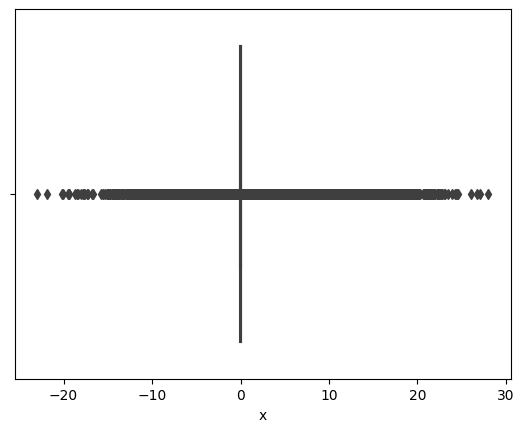

In [39]:
#Finding outliers using boxplot
import seaborn as sns
import pandas as pd
sns.boxplot(x=accelerometer_info['x'])

In [40]:
numeric_cols = accelerometer_info.select_dtypes(include=[float, int]).columns
q1 = accelerometer_info[numeric_cols].quantile(0.25)
q3 = accelerometer_info[numeric_cols].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [41]:
accelerometer_info[numeric_cols] = accelerometer_info[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


In [42]:
accelerometer_info.to_csv('cleaned.csv', index=False)

<Axes: xlabel='x'>

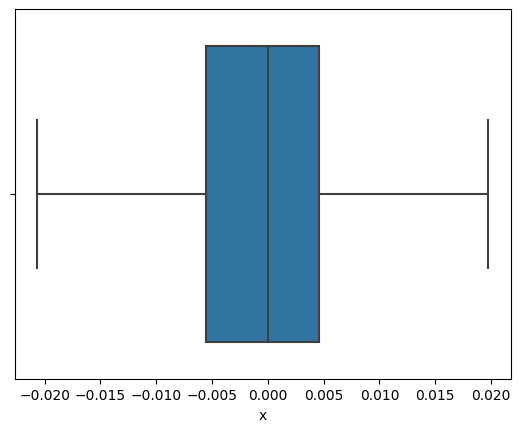

In [43]:
#Finding outliers using boxplot
import seaborn as sns
import pandas as pd
sns.boxplot(x=accelerometer_info['x'])

**4. Do pre-processing as per requirements of ML technique I**

**Ans**

**Data Preprocessing**

**Encoding**
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1.Label Encoding

2.One hot encoding

3.Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for pid, time features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy

In [44]:
# Dummy variable
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
categorical_columns = ['pid','time']
df_encode = pd.get_dummies(data = accelerometer_info, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [45]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',accelerometer_info.columns.values)
print('\nNumber of rows and columns in the dataset:',accelerometer_info.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['time' 'pid' 'x' 'y' 'z']

Number of rows and columns in the dataset: (1048575, 5)

Columns in data frame after encoding dummy variable:
 ['x' 'y' 'z' 'OHE_BU4707' 'OHE_CC6740' 'OHE_DC6359' 'OHE_HV0618'
 'OHE_JB3156' 'OHE_JR8022' 'OHE_MC7070' 'OHE_MJ8002' 'OHE_PC6771'
 'OHE_SA0297' 'OHE_SF3079']

Number of rows and columns in the dataset: (1048575, 14)


**5. Divide Data set in to training and validation sets**

**Ans**
**Train Test Spilt**

In [46]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('x',axis=1) # Independet variable
y = df_encode['x'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [47]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [48]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [49]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.000196,-0.000196
1,theta_1,y,0.005830,0.005830
2,theta_2,z,0.013561,0.013561
3,theta_3,OHE_BU4707,-0.000129,-0.000129
4,theta_4,OHE_CC6740,-0.000361,-0.000361
5,theta_5,OHE_DC6359,0.000388,0.000388
6,theta_6,OHE_HV0618,0.000598,0.000598
7,theta_7,OHE_JB3156,-0.004660,-0.004660
8,theta_8,OHE_JR8022,0.000006,0.000006
9,theta_9,OHE_MC7070,0.000015,0.000015


**6. Perform training**

**Ans** 

**Model Evaluation**

In [50]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.00016558899383919363
R square obtain for normal equation method is : 0.0130471864722973


In [51]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.00016558899383919363
R square obtain for scikit learn library is : 0.0130471864722973


**7. Perform Validation**

**Ans**

**Model Validation**

<ipython-input-59-52985dfb9ca9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


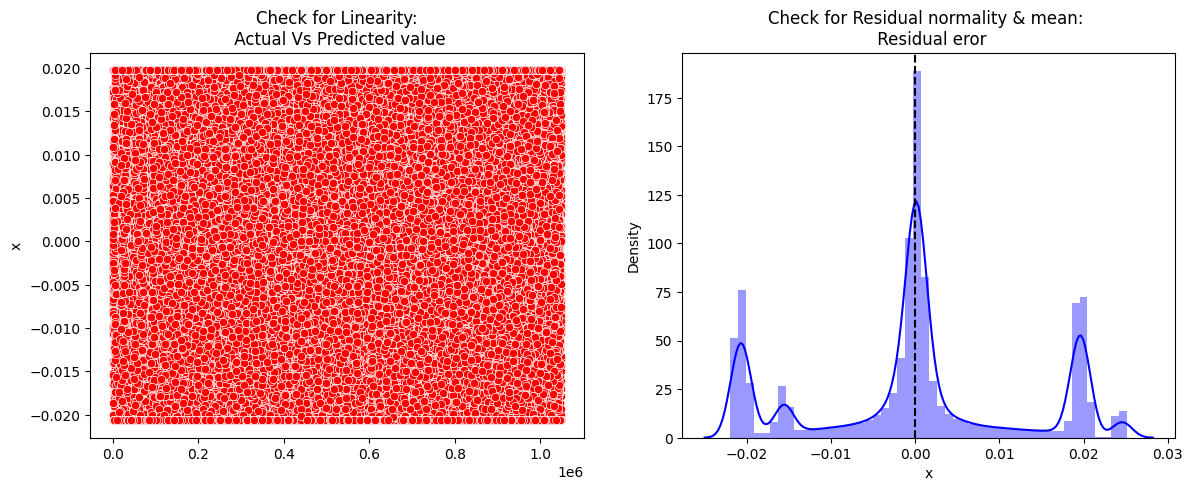

In [59]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

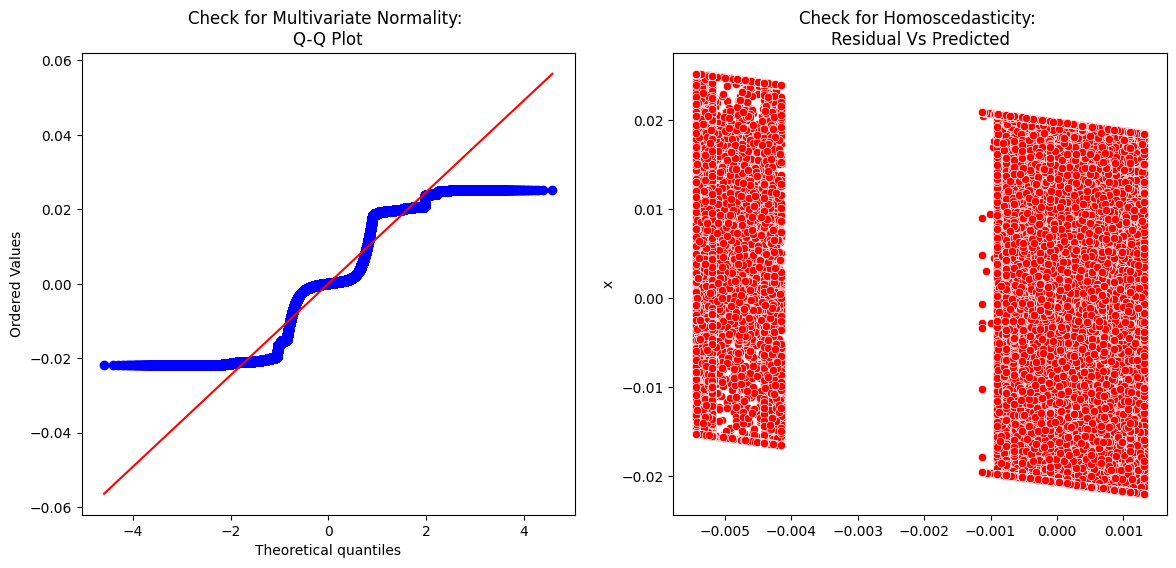

In [53]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [54]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

1.0132196659186392

**8. Report Accuracy of your trained ML Model**

**Ans**

**1. In our model the actual vs predicted plot is straight so linear assumption is acheived**

**2. The residual mean is zero and residual error plot is normally distributed**

**3. Q-Q plot shows as value log value greater than 0.02 trends to increase**

**4. The plot is exhibit homoscedasticity as the the residuals are equal across the regression line.**

**5. Variance inflation factor value is less than 5, so no multicollearity**
